# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your instructors.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

---

## Load data

In [2]:
df = pd.read_csv('data/mypersonality.csv')
df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

#### Create a new column called `status_length` that contains the length of each status:

In [3]:
df.columns = ['id', 'status', 'sext', 'sneu', 'sarg', 'scon', 'sopn', 'cext', 'cneu', 'carg', 'ccon', 'copn', 'date']

In [4]:
df['status_length'] = df['status'].map(lambda x: len(x))

#### Create a new column called `status_word_count` that contains the number of words in each status:

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [5]:
df['status_word_count'] = df['status'].map(lambda x: len(x.split()))

### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

#### Show the five longest and five shortest statuses based off of `status_word_count`:

In [6]:
for _ in df.sort_values(by=['status_word_count'], ascending=False)['status'][0:5]:
    print(_)
    print('*'*100)

Exact words when renewing DL: Me: Oh no, you can't take my license, It's my 25th b-day. How am I going to get into the bar? DMV: We gonna give you a new one over there Me: But, it won't have my picture and stuff on it.  Dmv:  Hold up, we can take a picture of your picture and put it on a license i think. (yelling at co-worker to see if this can be done) Yup! Me: So, I can go to the bar?! Dmv: (sigh) Yeah girl!
****************************************************************************************************
If I wear makeup, I'm fake. If I like to get dressed up, I'm a Tart. If I say what i think, I'm a bitch. If I cry sometimes, I'm a drama queen. If I have guy friends, I'm a slut. If I stand up for myself, I'm mouthy. Seems like you can't do anything now a days without being labeled.. So what, go ahead and label me, see if i give a shit. Repost this if your proud of who you are! x x
****************************************************************************************************

#### Many statuses have a word count of 1... so I've added in status length to get the shortest single word statuses

In [7]:
for _ in df.sort_values(by=['status_word_count', 'status_length'], ascending=True)['status'][:5]:
    print(_)
    print('*'*100)

<3
****************************************************************************************************
<3
****************************************************************************************************
15
****************************************************************************************************
:(
****************************************************************************************************
):
****************************************************************************************************


## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

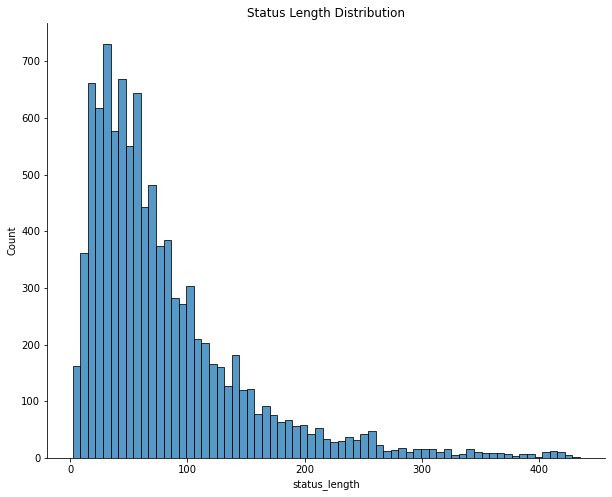

In [8]:
plt.figure(figsize=(10, 8))
plt.title('Status Length Distribution')
sns.histplot(df['status_length'])
sns.despine()
plt.show()

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

In [9]:
df.columns

Index(['id', 'status', 'sext', 'sneu', 'sarg', 'scon', 'sopn', 'cext', 'cneu',
       'carg', 'ccon', 'copn', 'date', 'status_length', 'status_word_count'],
      dtype='object')

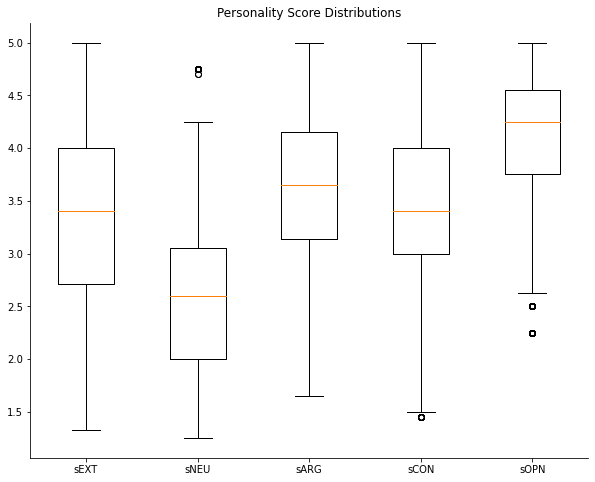

In [10]:
plt.figure(figsize=(10, 8))
plt.title('Personality Score Distributions')
plt.boxplot(df[['sext', 'sneu', 'sarg', 'scon', 'sopn']], labels=['sEXT', 'sNEU', 'sARG', 'sCON', 'sOPN'], )
sns.despine()
plt.show()

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [11]:
# 250 unique posters
df['id'].nunique()

250

In [12]:
# post count sorted by person
df.groupby(by='id').size().sort_values(ascending=False)

id
e6cdef6f475cce3023c5b715f8c9f110    223
6f2bebc01062eb8334dccba3e048fdb5    219
527ed53d2ba3a3bc417b8402d5b2f556    194
d7e500ad854a1b6ced39e53a525b8a6d    184
0737e4e4980f56c9fb1cb5743001c917    172
                                   ... 
ac8bf16a381d07c01b11651994ecb746      1
5532642937eb3497a43e15dbb23a9d2d      1
22d1f7b24168528163c515b1c96a879c      1
c255a1cb2939ce6b4719a8a0cc085624      1
00419a4c96b32cd63b2c7196da761274      1
Length: 250, dtype: int64

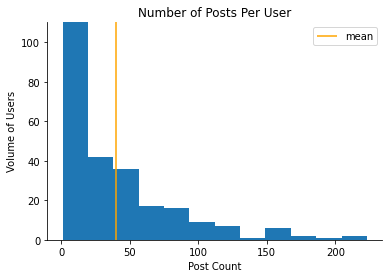

In [13]:
plt.title('Number of Posts Per User')
plt.ylabel('Volume of Users')
plt.xlabel('Post Count')
plt.hist(df.groupby(by='id').size().sort_values(ascending=False), bins=12)
plt.vlines(df.shape[0]/df['id'].nunique(), ymax=200, ymin=0, color='orange', label='mean')
plt.legend()
plt.ylim((0, 110))
sns.despine()

In [14]:
# About 40 posts per person
df.shape[0]/df['id'].nunique()

39.664

## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

#### Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [15]:
df.columns

Index(['id', 'status', 'sext', 'sneu', 'sarg', 'scon', 'sopn', 'cext', 'cneu',
       'carg', 'ccon', 'copn', 'date', 'status_length', 'status_word_count'],
      dtype='object')

In [16]:
for _ in ['cext', 'cneu', 'carg', 'ccon', 'copn']:
    df[_] = df[_].map({'y':1, 'n':0})

In [17]:
unique_users = df.groupby(by='id').mean().reset_index()

In [18]:
unique_users

,id,sext,sneu,sarg,scon,sopn,cext,cneu,carg,ccon,copn,status_length,status_word_count
0,00419a4c96b32cd63b2c7196da761274,1.90,4.15,3.15,4.65,3.45,0.0,1.0,0.0,1.0,0.0,15.000000,3.000000
1,02c37028a782cfda660c7243e45244bb,2.05,4.00,2.20,2.20,3.75,0.0,1.0,0.0,0.0,0.0,57.000000,6.000000
2,03133a828cd0cf52e3752813ce5d818f,3.84,3.55,2.85,4.32,3.45,1.0,1.0,0.0,1.0,0.0,133.800000,26.400000
3,03e6c4eca4269c183fa0e1780f73faba,3.20,3.60,3.85,4.35,4.80,0.0,1.0,1.0,1.0,1.0,117.750000,21.125000
4,06b055f8e2bca96496514891057913c3,2.85,2.35,3.35,4.70,3.35,0.0,0.0,0.0,1.0,0.0,116.666667,20.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,f83aa7290cf3ae8ed75d6aee5ebbb559,2.65,1.70,3.95,3.00,3.15,0.0,0.0,1.0,0.0,0.0,22.000000,3.500000
246,fbe5aa478508d1dc931427ade5d9e1b4,3.25,2.75,2.25,4.00,4.00,0.0,0.0,0.0,1.0,1.0,83.333333,15.666667
247,fc1c9fb6c64740edcbbf8cfe9dde8b02,3.55,2.25,3.90,2.80,4.00,0.0,0.0,1.0,0.0,1.0,87.866667,15.733333
248,fe22087986fdcc65939c793fe0ec90a9,3.45,2.55,3.15,3.50,2.90,0.0,0.0,0.0,1.0,0.0,65.631579,11.473684


#### Plot the distribution of personality scores for `unique_users`:

Do the distributions look different? Here, each individual user will only be represented once.

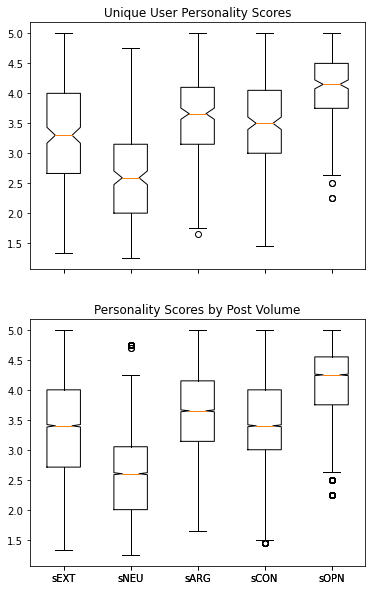

In [19]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6, 10))
ax[0].set_title('Unique User Personality Scores')
ax[1].set_title('Personality Scores by Post Volume')
ax[0].boxplot(unique_users[['sext', 'sneu', 'sarg', 'scon', 'sopn']], labels=['sEXT', 'sNEU', 'sARG', 'sCON', 'sOPN'], notch=True)
ax[1].boxplot(df[['sext', 'sneu', 'sarg', 'scon', 'sopn']], labels=['sEXT', 'sNEU', 'sARG', 'sCON', 'sOPN'], notch=True, )
plt.show()

# Distributions looks very similar when sorted by user and when not

#### Use the `.describe()` method on `unique_users`:

In [20]:
unique_users.describe()

,sext,sneu,sarg,scon,sopn,cext,cneu,carg,ccon,copn,status_length,status_word_count
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,3.292120,2.627240,3.600320,3.522920,4.07856,0.384000,0.396000,0.536000,0.520000,0.704000,76.301312,13.842040
std,0.861368,0.776835,0.670758,0.740211,0.57506,0.487334,0.490045,0.499703,0.500602,0.457407,36.589817,6.842261
min,1.330000,1.250000,1.650000,1.450000,2.25000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,2.662500,2.000000,3.150000,3.000000,3.75000,0.000000,0.000000,0.000000,0.000000,0.000000,51.187903,9.145833
50%,3.300000,2.590000,3.660000,3.500000,4.15000,0.000000,0.000000,1.000000,1.000000,1.000000,69.213889,12.613916
75%,4.000000,3.150000,4.100000,4.050000,4.50000,1.000000,1.000000,1.000000,1.000000,1.000000,95.859582,17.489583
max,5.000000,4.750000,5.000000,5.000000,5.00000,1.000000,1.000000,1.000000,1.000000,1.000000,236.000000,44.500000


In [21]:
df.describe()

,sext,sneu,sarg,scon,sopn,cext,cneu,carg,ccon,copn,status_length,status_word_count
count,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000,9916.000000
mean,3.354730,2.609515,3.616579,3.474244,4.130329,0.424466,0.374849,0.531162,0.459459,0.743142,80.646934,14.525111
std,0.857616,0.760261,0.682490,0.737240,0.585673,0.494287,0.484108,0.499053,0.498379,0.436922,68.242783,12.463420
min,1.330000,1.250000,1.650000,1.450000,2.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,2.710000,2.000000,3.140000,3.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,6.000000
50%,3.400000,2.600000,3.650000,3.400000,4.250000,0.000000,0.000000,1.000000,0.000000,1.000000,60.000000,11.000000
75%,4.000000,3.050000,4.150000,4.000000,4.550000,1.000000,1.000000,1.000000,1.000000,1.000000,104.000000,19.000000
max,5.000000,4.750000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,435.000000,89.000000


In [22]:
(df.describe() - unique_users.describe())[1:]

,sext,sneu,sarg,scon,sopn,cext,cneu,carg,ccon,copn,status_length,status_word_count
mean,0.062610,-0.017725,0.016259,-0.048676,0.051769,0.040466,-0.021151,-0.004838,-0.060541,0.039142,4.345622,0.683071
std,-0.003752,-0.016573,0.011732,-0.002971,0.010614,0.006953,-0.005937,-0.000650,-0.002223,-0.020484,31.652966,5.621159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.047500,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.187903,-3.145833
50%,0.100000,0.010000,-0.010000,-0.100000,0.100000,0.000000,0.000000,0.000000,-1.000000,0.000000,-9.213889,-1.613916
75%,0.000000,-0.100000,0.050000,-0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,8.140418,1.510417
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.000000,44.500000


In [23]:
# Stats on a per post basis look almost identical to the full distribution

### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

In [24]:
# Visualizations are typically easier to show the difference between the shapes of distributions.
# A table could be more useful when the information is short and sweet. Easy to digest. Consider a confusion matrix.

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Barcharts of users per category per trait
- A seaborn correlation heatmap
- A seaborn pairplot

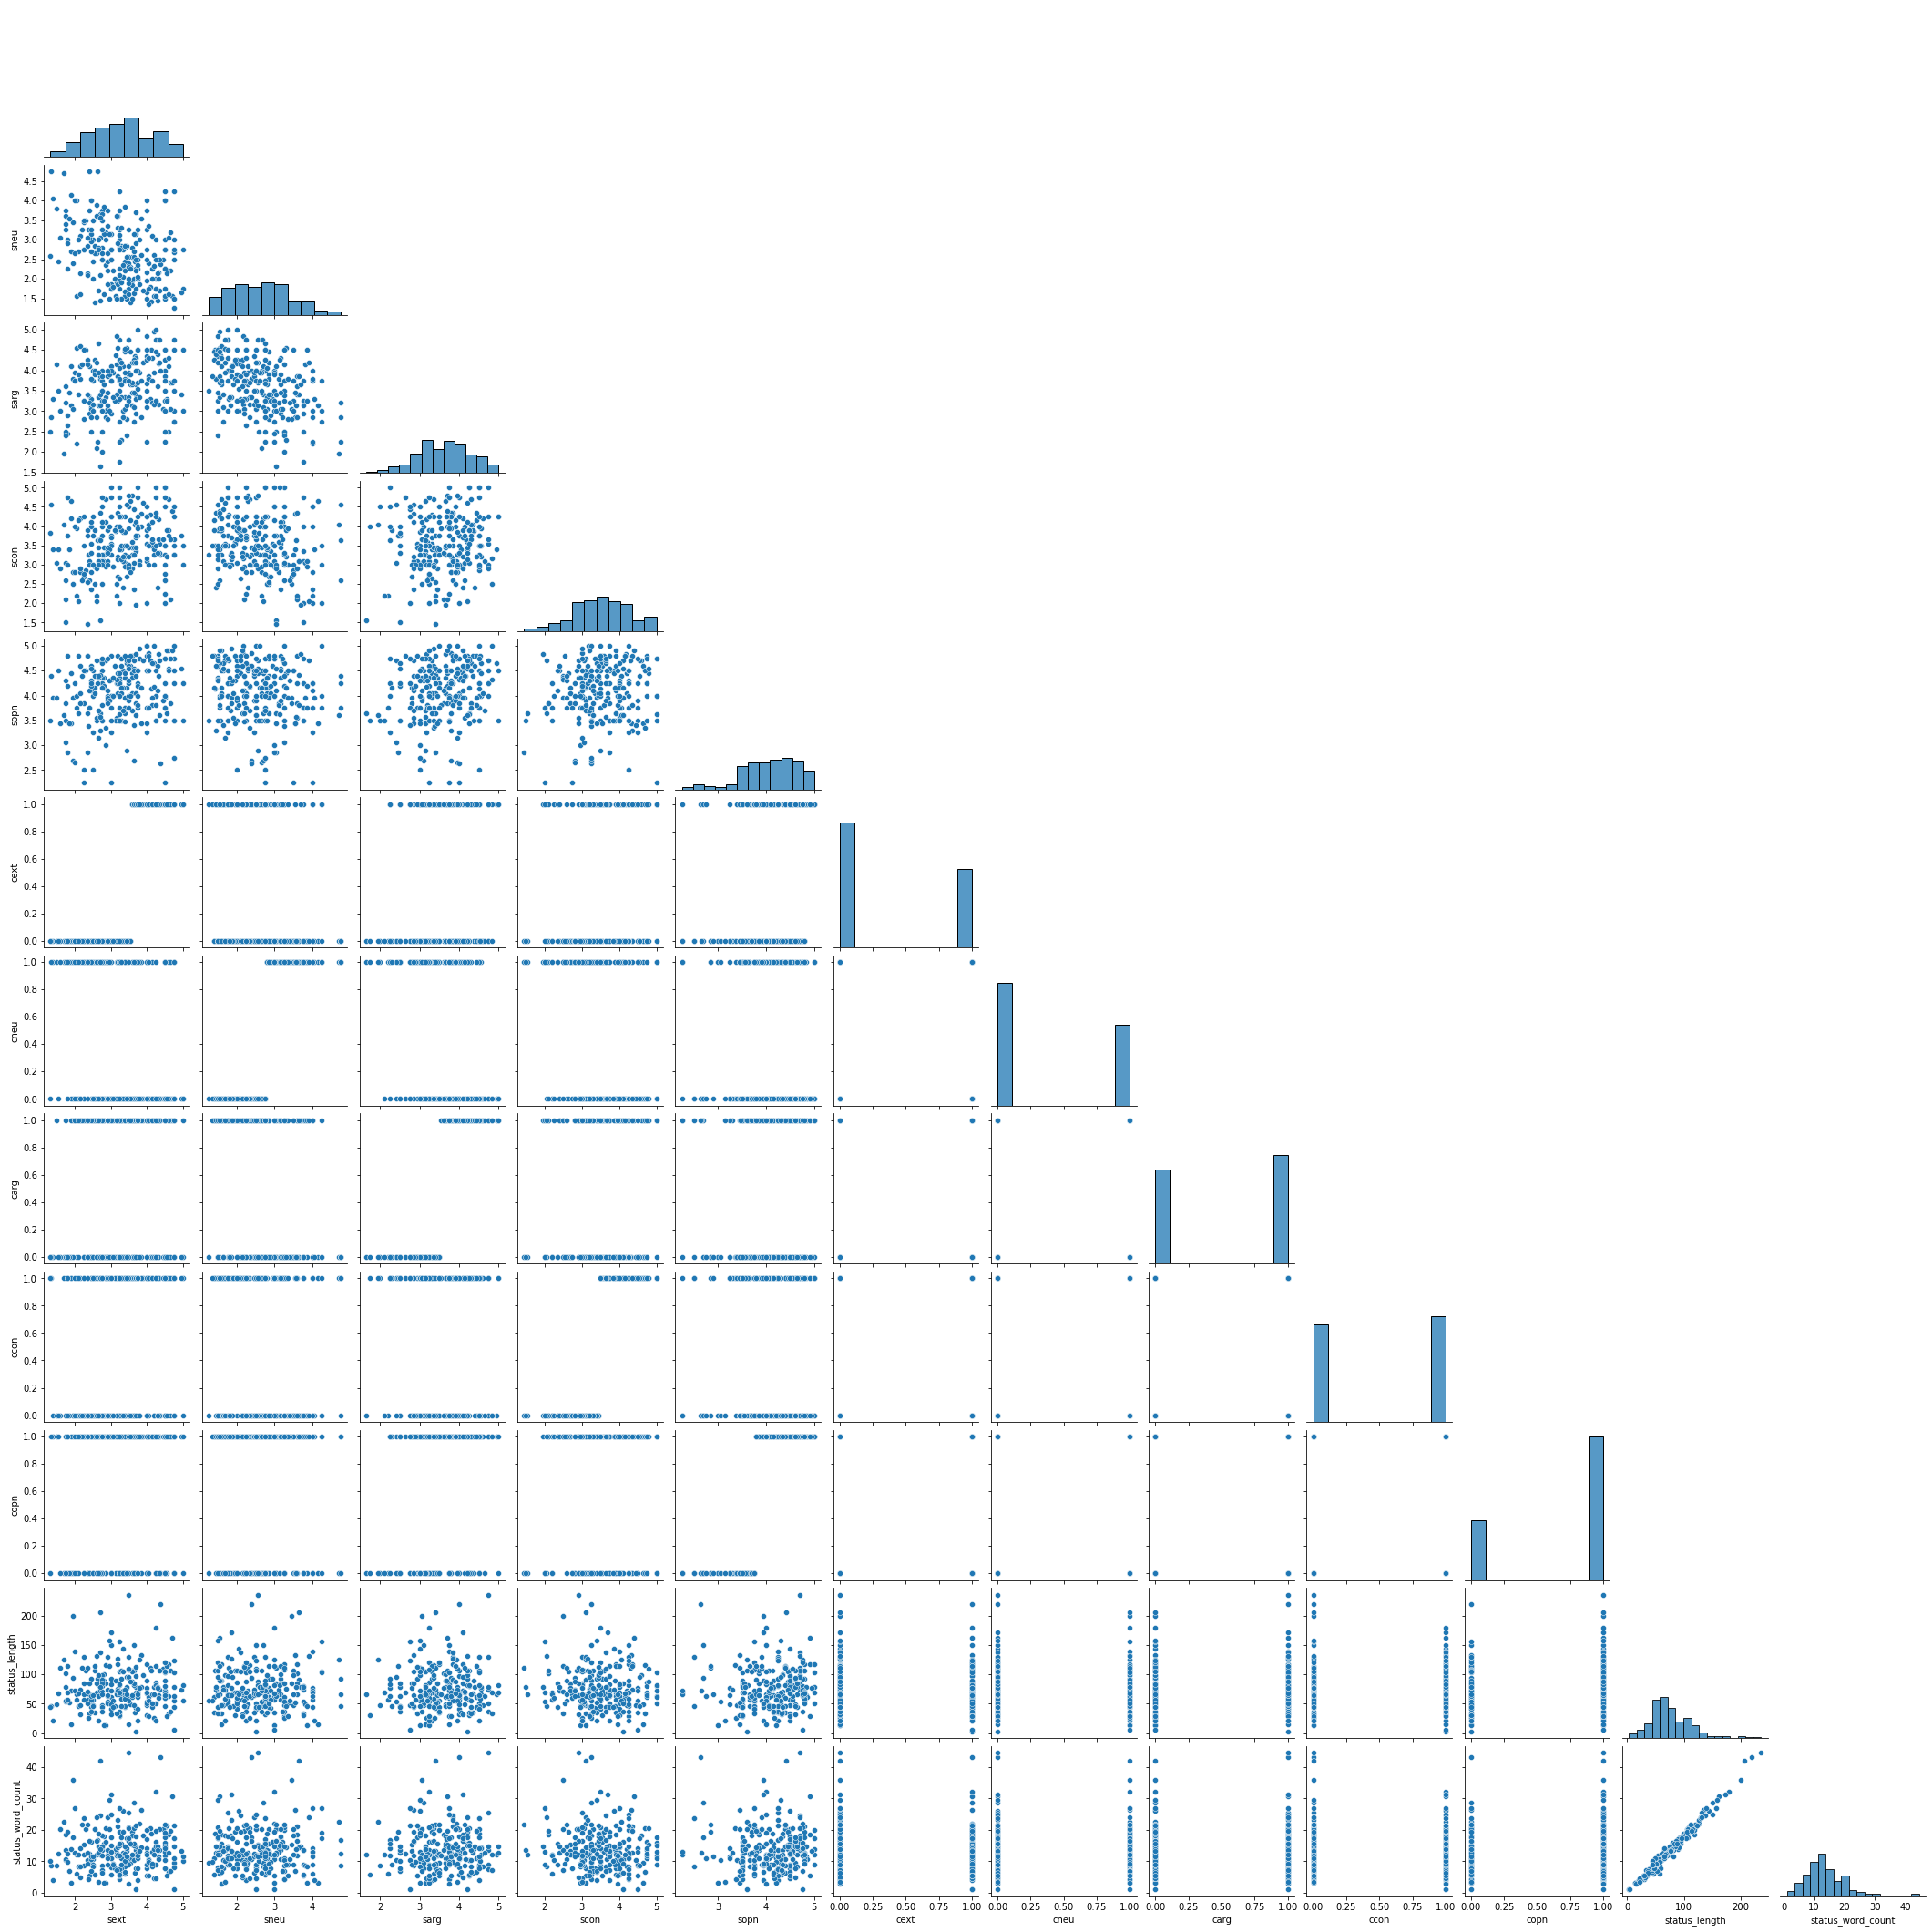

In [25]:
sns.pairplot(unique_users, corner=True)

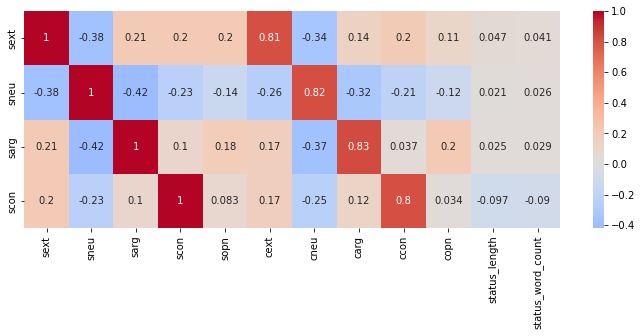

In [26]:
plt.figure(figsize=(12, 4))
sns.heatmap(unique_users.corr()[0:4], cmap='coolwarm', annot=True, center=0);

In [27]:
# interesting to see how our personality traits interact

---

## Exploring status length and word count based on personality

#### Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.

You'll need to use `groupby()` five separate times for this.

In [28]:
unique_users.groupby(by=['cext']).mean()    # not a lot of signal here

,sext,sneu,sarg,scon,sopn,cneu,carg,ccon,copn,status_length,status_word_count
cext,,,,,,,,,,,
0.0,2.742857,2.783506,3.512532,3.425844,4.004740,0.500000,0.50000,0.448052,0.675325,75.885829,13.760025
1.0,4.173229,2.376562,3.741146,3.678646,4.196979,0.229167,0.59375,0.635417,0.750000,76.967815,13.973605


In [29]:
unique_users.groupby(by=['cneu']).mean()    # not a lot of obvious signal here

,sext,sneu,sarg,scon,sopn,cext,carg,ccon,copn,status_length,status_word_count
cneu,,,,,,,,,,,
0.0,3.532252,2.115298,3.802781,3.670464,4.100000,0.490066,0.662252,0.615894,0.715232,76.443076,13.846353
1.0,2.925859,3.408081,3.291515,3.297879,4.045859,0.222222,0.343434,0.373737,0.686869,76.085086,13.835461


In [30]:
unique_users.groupby(by=['carg']).mean()    # cARG folks appear to make longer posts


,sext,sneu,sarg,scon,sopn,cext,cneu,ccon,copn,status_length,status_word_count
carg,,,,,,,,,,,
0.0,3.165259,2.894397,3.006724,3.42569,3.995431,0.336207,0.560345,0.474138,0.603448,74.605405,13.543094
1.0,3.401940,2.395970,4.114179,3.60709,4.150522,0.425373,0.253731,0.559701,0.791045,77.769410,14.100829


In [31]:
unique_users.groupby(by=['ccon']).mean()    # cCON folks appear to share their thoughts with shorter statements

,sext,sneu,sarg,scon,sopn,cext,cneu,carg,copn,status_length,status_word_count
ccon,,,,,,,,,,,
0.0,3.114417,2.797167,3.574583,2.904417,4.0315,0.291667,0.516667,0.491667,0.700000,79.48432,14.452237
1.0,3.456154,2.470385,3.624077,4.093846,4.1220,0.469231,0.284615,0.576923,0.707692,73.36315,13.278780


In [32]:
unique_users.groupby(by=['copn']).mean()    # we have talkers!

,sext,sneu,sarg,scon,sopn,cext,cneu,carg,ccon,status_length,status_word_count
copn,,,,,,,,,,,
0.0,3.151622,2.774189,3.391486,3.484054,3.376216,0.324324,0.418919,0.378378,0.513514,72.183251,13.079498
1.0,3.351193,2.565455,3.688125,3.539261,4.373864,0.409091,0.386364,0.602273,0.522727,78.032769,14.162653


#### Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:

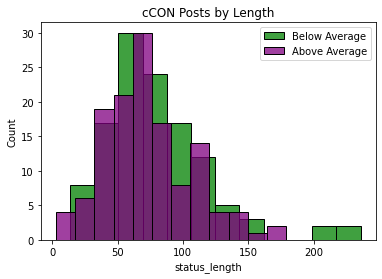

In [33]:
plt.title('cCON Posts by Length')
sns.histplot(unique_users[unique_users['ccon'] == 0]['status_length'], color='green', label='Below Average', bins=12)
sns.histplot(unique_users[unique_users['ccon'] == 1]['status_length'], color='purple', label='Above Average', bins=12)
plt.legend();

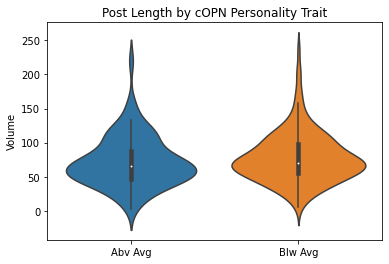

In [34]:
fig, ax = plt.subplots()
plt.title('Post Length by cOPN Personality Trait')
sns.violinplot(data=unique_users, x='copn', y='status_length', label=['Above Avg', 'Below Avg'])
ax.set_xticklabels(['Abv Avg', 'Blw Avg'])
plt.ylabel('Volume')
plt.xlabel('');


In [35]:
unique_users.columns

Index(['id', 'sext', 'sneu', 'sarg', 'scon', 'sopn', 'cext', 'cneu', 'carg',
       'ccon', 'copn', 'status_length', 'status_word_count'],
      dtype='object')

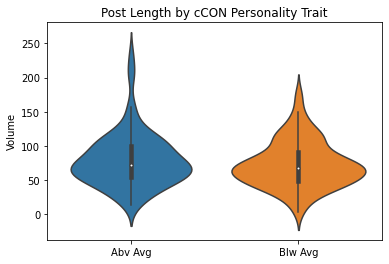

In [36]:
fig, ax = plt.subplots()
plt.title('Post Length by cCON Personality Trait')
sns.violinplot(data=unique_users, x='ccon', y='status_length', label=['Above Avg', 'Below Avg'])
ax.set_xticklabels(['Abv Avg', 'Blw Avg'])
plt.ylabel('Volume')
plt.xlabel('');

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

### Show the 15 most common words

In [38]:
cv = CountVectorizer()
cv.fit(df['status'])

status_tf = cv.transform(df['status'])
status_tf = pd.DataFrame(status_tf.A, columns=cv.get_feature_names_out())
status_tf.sum().sort_values(ascending=False)[:15]

the         4982
to          4476
is          3156
and         3057
of          2093
in          1984
it          1669
for         1641
my          1564
you         1495
propname    1309
that        1158
on          1094
with         956
be           894
dtype: int64

### Show the frequency of the 15 most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

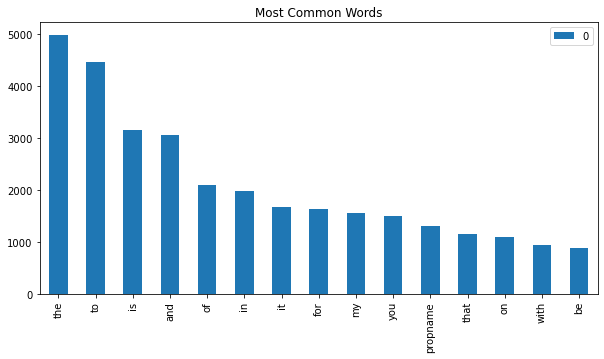

In [39]:
labels = status_tf.sum().sort_values(ascending=False)[0:15].to_frame()
labels.plot(kind='bar', figsize=(10, 5), title='Most Common Words');

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [40]:
df['status'][status_tf['propname'] > 0][0:10]

6                                                                                                                                                                                                                                                         saw a nun zombie, and liked it. Also, *PROPNAME* + Tentacle!Man + Psychic Powers = GREAT Party.
18                                                                                                                                                                                                                                                                                                         is tired. *PROPNAME*, let me go to sleep pl0x.
69                                                                                                                                                                                                              has a fair idea of how to manage the 2.5 kids cliche... She just needs a very strong gentleman named

#### Provide a short explanation of what you believe `propname` to be:

Hint: The attached PDF also contains an explanation.

In [41]:
# it looks like propname is a placeholder for a tagged person's name

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

#### Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:

In [42]:
text_and_scores = status_tf.join(df[['sext', 'sneu', 'sarg', 'scon', 'sopn', 'cext', 'cneu', 'carg', 'ccon', 'copn']])
text_and_scores

,00,000,000ft,00am,00pm,01,02,02pm,03,0330,...,sext,sneu,sarg,scon,sopn,cext,cneu,carg,ccon,copn
0,0,0,0,0,0,0,0,0,0,0,...,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,0,0,0,0,0,0,0,0,0,0,...,2.15,2.15,4.10,2.90,4.60,0,0,1,0,1
9912,0,0,0,0,0,0,0,0,0,0,...,4.05,3.35,3.80,3.95,4.50,1,1,1,1,1
9913,0,0,0,0,0,0,0,0,0,0,...,4.05,3.35,3.80,3.95,4.50,1,1,1,1,1
9914,0,0,0,0,0,0,0,0,0,0,...,1.40,4.05,3.30,3.40,3.95,0,1,0,0,1


#### Show the 25 most common words for statuses from high-cAGR users:

In [43]:
text_and_scores.iloc[:,:-10][text_and_scores['carg'] == 1].sum().sort_values(ascending=False)[:25]

the         2581
to          2411
is          1686
and         1590
of          1156
in           986
for          891
it           857
my           847
you          821
propname     699
that         600
on           570
with         506
be           485
me           449
at           426
this         417
just         402
have         386
all          370
so           365
not          340
can          328
her          324
dtype: int64

#### Show the 25 most common words for statuses from low-cAGR users:

In [44]:
text_and_scores.iloc[:,:-10][text_and_scores['carg'] == 0].sum().sort_values(ascending=False)[:25]

the         2401
to          2065
is          1470
and         1467
in           998
of           937
it           812
for          750
my           717
you          674
propname     610
that         558
on           524
with         450
be           409
at           370
me           367
so           361
this         343
not          343
have         334
just         315
can          308
but          303
all          279
dtype: int64

### (BONUS) Most common bigrams:

This is a bonus section and not required.

Find the 10 most common bigrams in the dataset.

### (BONUS) Most common trigrams:

This is a bonus section and not required.

Find the 10 most common trigrams in the dataset.

---

## (BONUS) Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In blogging and presenting, you'll focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience. In other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### (BONUS) Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as _explanatory_. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly. Provide a one to two paragraph explanation/interpretation of the visual.